# <center>Итоговый проект: Fashion-MNIST

Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. Этот набор данных представляет из себя альтернативу обычному датасету рукописных цифр MNIST. Существовало несколько предпосылок для создания такого набора данных.

Большинство исследователей в области машинного и глубинного обучения используют MNIST при первой проверки своих моделей, что не всегда является хорошей идеей. Если какая-то модель не работает на датасете MNIST – это не значит, что она не работает в принципе. Если какая-то модель прекрасно работает на датасете MNIST – это не означает, что она так же хорошо будет работать на других датасетах. Известны случаи в отказе публикации некоторых статей из-за недостаточно хорошего качества модели на MNIST. Поэтому Zalando Research предложили альтернативу.

В Fashion-MNIST содержится 10 классов разной одежды по аналогии с 10 цифрами из MNIST. Скачать датасет и найти его подробное описание можно найти здесь

- [Fashion-MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

In [1]:
import os
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split
import random

In [2]:
# plt.style.use('ggplot')

In [3]:
path_to_data = "data"

### Загрузка данных

In [4]:
data_test = pd.read_csv(os.path.join(path_to_data, "fashion-mnist_test.csv"))
data_test.shape

(10000, 785)

In [5]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_train = pd.read_csv(os.path.join(path_to_data, "fashion-mnist_train.csv"))
data_train.shape

(60000, 785)

В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке.

### посмотрим на силуэты, с которыми будем работать

In [7]:
def picture_show(data, num, ax=plt):
    picture = data.drop("label", axis=1).values[num].reshape((28, 28))
    ax.imshow(picture, cmap=plt.cm.binary);

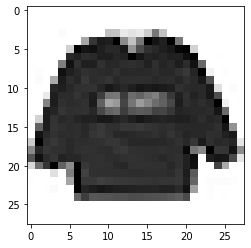

In [8]:
picture_show(data_train, 0)

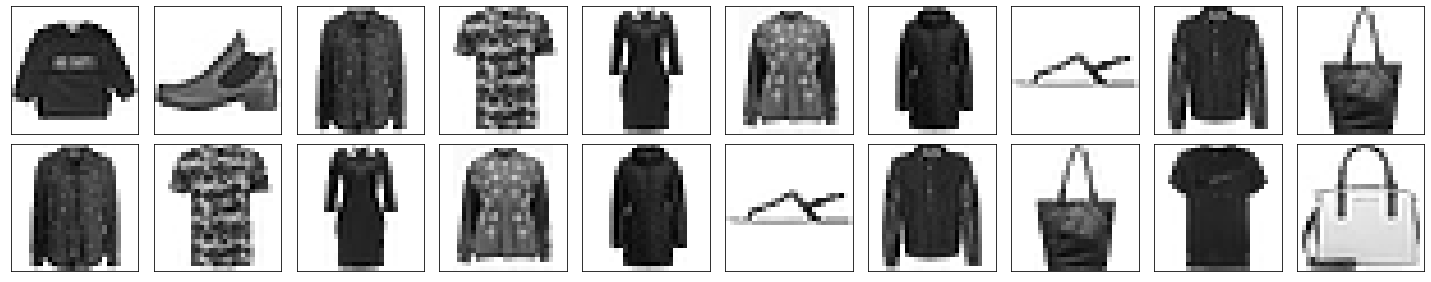

In [9]:
nrows, ncols = 2, 10
fig, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for row in range(nrows):
    for col in range(ncols):
        num = row * nrows + col
        picture_show(data_train, num, ax[row, col])
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
plt.tight_layout()

### Подготовим данные

In [10]:
def get_x_y(data, num_classes=10):
    x = data.drop("label", axis=1).values.reshape(-1, 784).astype("float32") / 255
    y = tf.keras.utils.to_categorical(data["label"].values, num_classes)
    return x, y

In [13]:
num_classes = 10 

x, y = get_x_y(data_train, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

x_test, y_test = get_x_y(data_test, num_classes)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((45000, 784),
 (45000, 10),
 (15000, 784),
 (15000, 10),
 (10000, 784),
 (10000, 10))

## 1. Логистическая регрессия

Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Рекомендуется использовать **tensorflow** или **keras** для выполнения этого задания. Используйте стохастический градиентный спуск (**stochastic gradient descent**) в качестве алгоритма оптимизации.

По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать **softmax**.

Обучите логистическую регрессию на тренировочной выборке и оцените качество на тестовой выборке используя метрику **accuracy**. Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту **tensorboard**
- [tensorboard в tensorflow](https://www.tensorflow.org/guide/summaries_and_tensorboard)
- [tensorboard в keras](https://keras.io/callbacks/#tensorboard)

In [15]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Dense(num_classes, input_shape=(784,), activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []

    def on_epoch_end (self, epoch, logs={}):
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        

In [18]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 3s 64us/sample - loss: 0.8863 - accuracy: 0.7202 - val_loss: 0.6808 - val_accuracy: 0.7768
Epoch 2/20
45000/45000 [==============================] - 2s 50us/sample - loss: 0.6265 - accuracy: 0.7983 - val_loss: 0.5952 - val_accuracy: 0.8021
Epoch 3/20
45000/45000 [==============================] - 2s 49us/sample - loss: 0.5703 - accuracy: 0.8137 - val_loss: 0.5591 - val_accuracy: 0.8116
Epoch 4/20
45000/45000 [==============================] - 2s 49us/sample - loss: 0.5402 - accuracy: 0.8223 - val_loss: 0.5397 - val_accuracy: 0.8119
Epoch 5/20
45000/45000 [==============================] - 2s 49us/sample - loss: 0.5203 - accuracy: 0.8283 - val_loss: 0.5229 - val_accuracy: 0.8238
Epoch 6/20
45000/45000 [==============================] - 2s 49us/sample - loss: 0.5060 - accuracy: 0.8317 - val_loss: 0.5075 - val_accuracy: 0.8270
Epoch 7/20
45000/45000 [==============================] 

In [19]:
plt.style.use('ggplot')

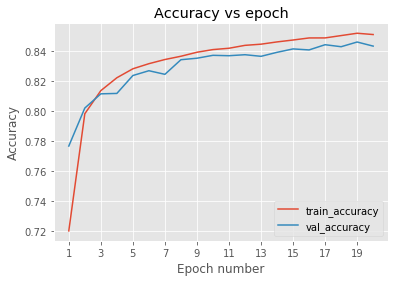

In [20]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.4530133586883545
Test accuracy: 0.8508


## 2. Полносвязная нейронная сеть

Реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучить модель и посчитать качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?

In [22]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Dense(256, activation="relu", input_shape=(784,))) 
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [23]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [24]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 112us/sample - loss: 0.7706 - accuracy: 0.7454 - val_loss: 0.5603 - val_accuracy: 0.8059
Epoch 2/20
45000/45000 [==============================] - 5s 101us/sample - loss: 0.5132 - accuracy: 0.8224 - val_loss: 0.5431 - val_accuracy: 0.8114
Epoch 3/20
45000/45000 [==============================] - 5s 111us/sample - loss: 0.4625 - accuracy: 0.8381 - val_loss: 0.5724 - val_accuracy: 0.7907
Epoch 4/20
45000/45000 [==============================] - 5s 102us/sample - loss: 0.4325 - accuracy: 0.8505 - val_loss: 0.4274 - val_accuracy: 0.8525
Epoch 5/20
45000/45000 [==============================] - 5s 104us/sample - loss: 0.4136 - accuracy: 0.8544 - val_loss: 0.4235 - val_accuracy: 0.8503
Epoch 6/20
45000/45000 [==============================] - 5s 106us/sample - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.4114 - val_accuracy: 0.8534
Epoch 7/20
45000/45000 [==========================

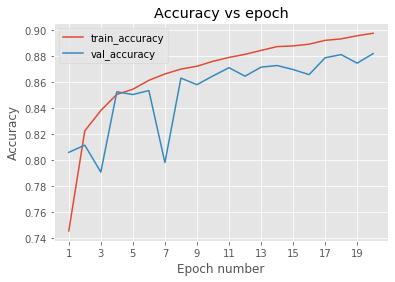

In [25]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [26]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.3225673417329788
Test accuracy: 0.8862


#### Анализ:    
Качество по **accuracy** на тестовой выборке выросло. Объяснить можно наличием скрытых слоев с нелинейными функциями активации

## 3. Сверточная нейронная сеть

Реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют **keras** или **tensorflow**.

#### подготовим данные (переформатируем под сверточные сети)

In [31]:
x_train = x_train.reshape(-1, 28, 28, 1) 
x_val = x_val.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например **Max Pooling** слои. Они понижают размерность сходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.

In [32]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [33]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [34]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 30s 677us/sample - loss: 0.9748 - accuracy: 0.6544 - val_loss: 0.6638 - val_accuracy: 0.7518
Epoch 2/20
45000/45000 [==============================] - 33s 727us/sample - loss: 0.5828 - accuracy: 0.7832 - val_loss: 0.5565 - val_accuracy: 0.7911
Epoch 3/20
45000/45000 [==============================] - 32s 701us/sample - loss: 0.4958 - accuracy: 0.8177 - val_loss: 0.4646 - val_accuracy: 0.8313
Epoch 4/20
45000/45000 [==============================] - 29s 650us/sample - loss: 0.4481 - accuracy: 0.8375 - val_loss: 0.4442 - val_accuracy: 0.8385
Epoch 5/20
45000/45000 [==============================] - 31s 690us/sample - loss: 0.4182 - accuracy: 0.8483 - val_loss: 0.4930 - val_accuracy: 0.8209
Epoch 6/20
45000/45000 [==============================] - 32s 716us/sample - loss: 0.3939 - accuracy: 0.8584 - val_loss: 0.4129 - val_accuracy: 0.8480
Epoch 7/20
45000/45000 [====================

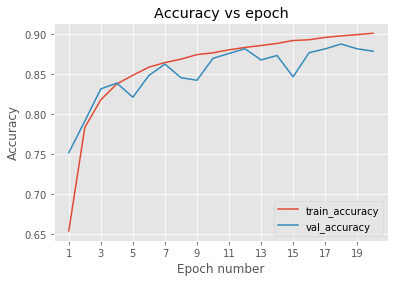

In [35]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [36]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.3240526438474655
Test accuracy: 0.8797


Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.

Добавим два **Convolution** слоя (без пуллинга, уже маловато разрешения для этого)

In [37]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [38]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [39]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 33s 741us/sample - loss: 1.1656 - accuracy: 0.5820 - val_loss: 1.1658 - val_accuracy: 0.5275
Epoch 2/20
45000/45000 [==============================] - 34s 752us/sample - loss: 0.6551 - accuracy: 0.7524 - val_loss: 0.6543 - val_accuracy: 0.7257
Epoch 3/20
45000/45000 [==============================] - 32s 715us/sample - loss: 0.5563 - accuracy: 0.7917 - val_loss: 0.5892 - val_accuracy: 0.7739
Epoch 4/20
45000/45000 [==============================] - 32s 721us/sample - loss: 0.4971 - accuracy: 0.8162 - val_loss: 0.5082 - val_accuracy: 0.8071
Epoch 5/20
45000/45000 [==============================] - 33s 733us/sample - loss: 0.4565 - accuracy: 0.8315 - val_loss: 0.4475 - val_accuracy: 0.8305
Epoch 6/20
45000/45000 [==============================] - 34s 750us/sample - loss: 0.4253 - accuracy: 0.8449 - val_loss: 0.4106 - val_accuracy: 0.8504
Epoch 7/20
45000/45000 [====================

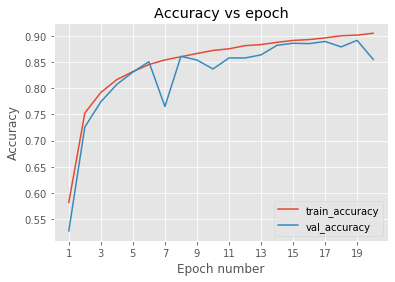

In [40]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [41]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.39342151937484743
Test accuracy: 0.8589


#### Анализ:
Добавление сверточных слоев качество на трейне увеличило, на валидации и тесте качество даже уменьшилось. Все указывает на переобучение, похоже - требуется усиление регуляризации.

В заключение, рекомендуется попробовать добавить **Batch Normalization** слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.

In [42]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [43]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 64)         

In [44]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 40s 880us/sample - loss: 0.5262 - accuracy: 0.8160 - val_loss: 0.4877 - val_accuracy: 0.8213
Epoch 2/20
45000/45000 [==============================] - 34s 755us/sample - loss: 0.3560 - accuracy: 0.8731 - val_loss: 0.3965 - val_accuracy: 0.8521
Epoch 3/20
45000/45000 [==============================] - 35s 781us/sample - loss: 0.3083 - accuracy: 0.8883 - val_loss: 0.3055 - val_accuracy: 0.8905
Epoch 4/20
45000/45000 [==============================] - 34s 755us/sample - loss: 0.2783 - accuracy: 0.9017 - val_loss: 0.4090 - val_accuracy: 0.8427
Epoch 5/20
45000/45000 [==============================] - 34s 745us/sample - loss: 0.2562 - accuracy: 0.9072 - val_loss: 0.3534 - val_accuracy: 0.8697
Epoch 6/20
45000/45000 [==============================] - 34s 762us/sample - loss: 0.2405 - accuracy: 0.9125 - val_loss: 0.2996 - val_accuracy: 0.8946
Epoch 7/20
45000/45000 [====================

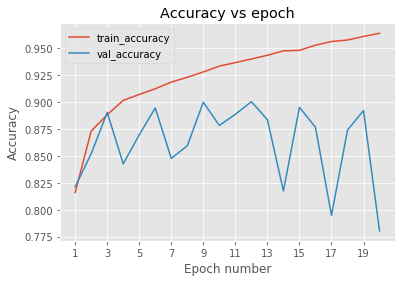

In [45]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [46]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.9806315941572189
Test accuracy: 0.7791


### Анализ:    
Качество на трейне растет, на валидации и тесте - падает. Явное переобучение. Необходима дальнейшая работа над оптимизацией архитектуры сети. Возможно, недостаточно данных.

Как было заявлено -   
"цель – научиться работать с различными моделями машинного обучения. Вам необязательно строить самую лучшую модель и получать лучшее качество на тестовых данных. Самое важное – это научиться обучать модели и анализировать полученные результаты"

Поэтому оптимизировать дальше не будем, ограничимся процессом опробования и анализа различных архитектур.